# Desafio LATAM

El problema consiste en predecir la probabilidad de atraso de los vuelos que aterrizan o despegan del aeropuerto de Santiago de Chile (SCL). Para eso se entrega un dataset usando datos públicos y reales donde cada fila corresponde a un vuelo que
aterrizó o despegó de SCL.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import graphics_functions as gf
import warnings
warnings.filterwarnings('ignore')


! pip install phik 
import phik
from phik.report import plot_correlation_matrix
from phik import report


You should consider upgrading via the 'C:\Users\jopri\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip' command.


## Análisis del dataset

El dataset se encuentra en el fichero *dataset_SCL.csv*, y a continuación se realiza una primera vista del mismo con las primeras cinco observaciones.


In [2]:
data=pd.read_csv('data/dataset_SCL.csv')
data.head()

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
0,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,SCEL,KMIA,AAL,1,1,2017,Domingo,I,American Airlines,Santiago,Miami
1,2017-01-02 23:30:00,226,SCEL,KMIA,AAL,2017-01-02 23:39:00,226,SCEL,KMIA,AAL,2,1,2017,Lunes,I,American Airlines,Santiago,Miami
2,2017-01-03 23:30:00,226,SCEL,KMIA,AAL,2017-01-03 23:39:00,226,SCEL,KMIA,AAL,3,1,2017,Martes,I,American Airlines,Santiago,Miami
3,2017-01-04 23:30:00,226,SCEL,KMIA,AAL,2017-01-04 23:33:00,226,SCEL,KMIA,AAL,4,1,2017,Miercoles,I,American Airlines,Santiago,Miami
4,2017-01-05 23:30:00,226,SCEL,KMIA,AAL,2017-01-05 23:28:00,226,SCEL,KMIA,AAL,5,1,2017,Jueves,I,American Airlines,Santiago,Miami


In [3]:
data.shape

(68206, 18)

El dataset contiene 18 variables con 68206 observaciones, y el tipo de datos de las variables se observa en la salida de los códigos siguentes.

In [4]:
data.dtypes

Fecha-I      object
Vlo-I        object
Ori-I        object
Des-I        object
Emp-I        object
Fecha-O      object
Vlo-O        object
Ori-O        object
Des-O        object
Emp-O        object
DIA           int64
MES           int64
AÑO           int64
DIANOM       object
TIPOVUELO    object
OPERA        object
SIGLAORI     object
SIGLADES     object
dtype: object

Existen muchas variables de tipo object, hay que convertirlas al valor adecuado para analizar los datos. 

## Punto 1 
*¿Cómo se distribuyen los datos? ¿Qué te llama la atención o cuál es tu conclusión sobre esto?*

Vamos a revisar si existen valores NaN, luego a convertir a datetime las fechas, y a entero el numero de vuelo. El resto de las variables se puede quedar con el tipo que le asigna pandas. 

In [5]:

data[data.isna().any(axis=1)]


,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
6068,2017-01-19 11:00:00,200,SCEL,SPJC,LAW,2017-01-19 11:03:00,NaN,SCEL,SPJC,56R,19,1,2017,Jueves,I,Latin American Wings,Santiago,Lima


Se observa que el número de vuelo en operación falta, por tanto le agrego el mismo que fue programado.  

In [6]:
data.loc[6068,'Vlo-O']="200"
data.iloc[[6068]]

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
6068,2017-01-19 11:00:00,200,SCEL,SPJC,LAW,2017-01-19 11:03:00,200,SCEL,SPJC,56R,19,1,2017,Jueves,I,Latin American Wings,Santiago,Lima


Vamos a convertir las variables Vlo-I y Vlo-O a entero, para ello observo si existe algún error que me impida realizar la conversión.

In [7]:
df = data[data ['Vlo-O'].str.contains('[A-Za-z]', na=False)]  
df.head()

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
13906,2017-03-30 10:30:00,71,SCEL,SCIE,SKU,2017-03-30 10:50:00,71R,SCEL,SCIE,SKU,30,3,2017,Jueves,N,Sky Airline,Santiago,Concepcion
13907,2017-03-22 11:00:00,1071,SCEL,SCIE,SKU,2017-03-22 11:00:00,71R,SCEL,SCIE,SKU,22,3,2017,Miercoles,N,Sky Airline,Santiago,Concepcion
17055,2017-03-22 10:00:00,201,SCEL,SCIE,LXP,2017-03-22 11:50:00,201R,SCEL,SCIE,LXP,22,3,2017,Miercoles,N,Grupo LATAM,Santiago,Concepcion
19207,2017-04-25 09:00:00,71,SCEL,SCIE,SKU,2017-04-25 09:29:00,71R,SCEL,SCIE,SKU,25,4,2017,Martes,N,Sky Airline,Santiago,Concepcion
22167,2017-04-06 21:10:00,43,SCEL,SCIE,LAW,2017-04-06 21:24:00,43R,SCEL,SCIE,JMR,6,4,2017,Jueves,N,Latin American Wings,Santiago,Concepcion


In [8]:
data['Vlo-I']=data['Vlo-I'].replace('[A-Za-z]', '', regex=True)
data['Vlo-O']=data['Vlo-O'].replace('[A-Za-z]', '', regex=True)

data['Vlo-O']=data['Vlo-O'].astype(float) # Tiene números con valores decimales
data['Vlo-O']=data['Vlo-O'].astype(int)
data['Vlo-I']=data['Vlo-I'].astype(int)

#Convierto las fechas a datatime
data['Fecha-I']=pd.to_datetime(data['Fecha-I'])
data['Fecha-O']=pd.to_datetime(data['Fecha-O'])

print(data.dtypes)

Fecha-I      datetime64[ns]
Vlo-I                 int32
Ori-I                object
Des-I                object
Emp-I                object
Fecha-O      datetime64[ns]
Vlo-O                 int32
Ori-O                object
Des-O                object
Emp-O                object
DIA                   int64
MES                   int64
AÑO                   int64
DIANOM               object
TIPOVUELO            object
OPERA                object
SIGLAORI             object
SIGLADES             object
dtype: object


Como los datos son del aeropuerto de Santiago de Chile, compruebo si las columnas **Ori-I**, **Ori-O** y **SIGLAORI** se refieren a la misma información. Reviso además si puedo realizar alguna conclusion parcial de los datos revisando los valores únicos por columnas.

In [9]:
data.nunique()

Fecha-I      53252
Vlo-I          581
Ori-I            1
Des-I           64
Emp-I           30
Fecha-O      62774
Vlo-O          595
Ori-O            1
Des-O           63
Emp-O           32
DIA             31
MES             12
AÑO              2
DIANOM           7
TIPOVUELO        2
OPERA           23
SIGLAORI         1
SIGLADES        62
dtype: int64

Lo primero que se observa es que las variables **Ori-I**, **Ori-O** y **SIGLAORI** contienen un único valor que corresponde a la ciudad de Santiago, por tanto manejan la misma información y estas columnas van a ser eliminadas. 

In [10]:
data.drop(['Ori-I','Ori-O', 'SIGLAORI'], axis=1, inplace=True)

 Reviso además si existe algún destino a Santiago, de no ser así estaríamos en presencia de operaciones de arribo. 


In [11]:
data[(data['Des-O']=="SCEL")|(data['Des-I']=="SCEL")|(data['SIGLADES']=="Santiago")]

,Fecha-I,Vlo-I,Des-I,Emp-I,Fecha-O,Vlo-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLADES


No existen filas con destino Santiago, por lo que se puede concluir que los datos solamente corresponden a operaciones de despegue.

En los valores únicos se observa además que existe un balance entre las cantidad de vuelos en operaciones (Vlo-O: 595) y vuelos programados(Vlo-I:581) y similar cantidad de destinos de operación(Des-O:63) y destinos programados (Des-I:64). Lo que hace pensar en principio que al menos en esta data, la probabilidad de atraso de un vuelo sea baja. 

In [12]:
df=pd.DataFrame(data={'Des-I vs Des-O': [len(data[['Des-I', 'Des-O']][data['Des-I'] != data['Des-O']])],
                      '%Dest':[(len(data[['Des-I', 'Des-O']][data['Des-I'] != data['Des-O']])/data.shape[0])*100],
                      'Vlo-I vs Vlo-O':[len(data[['Vlo-I', 'Vlo-O']][data['Vlo-I'] != data['Vlo-O']])],
                     '%Vlo':[(len(data[['Vlo-I', 'Vlo-O']][data['Vlo-I'] != data['Vlo-O']])/data.shape[0])*100],} )
print(df)

   Des-I vs Des-O     %Dest  Vlo-I vs Vlo-O      %Vlo
0              28  0.041052             102  0.149547


En este caso, en todo el dataset 28 vuelos sufren cambios en el destino, y 102 en el número de vuelo que finalmente opera. Estos valores pueden o no influir en los atrasos, pero solo representan el 0.04% y 0.15% respectivamente del dataset.    


Vamos a verificar las distribuciones de los datos y sus correlaciones. 

In [13]:
data.columns

Index(['Fecha-I', 'Vlo-I', 'Des-I', 'Emp-I', 'Fecha-O', 'Vlo-O', 'Des-O',
       'Emp-O', 'DIA', 'MES', 'AÑO', 'DIANOM', 'TIPOVUELO', 'OPERA',
       'SIGLADES'],
      dtype='object')

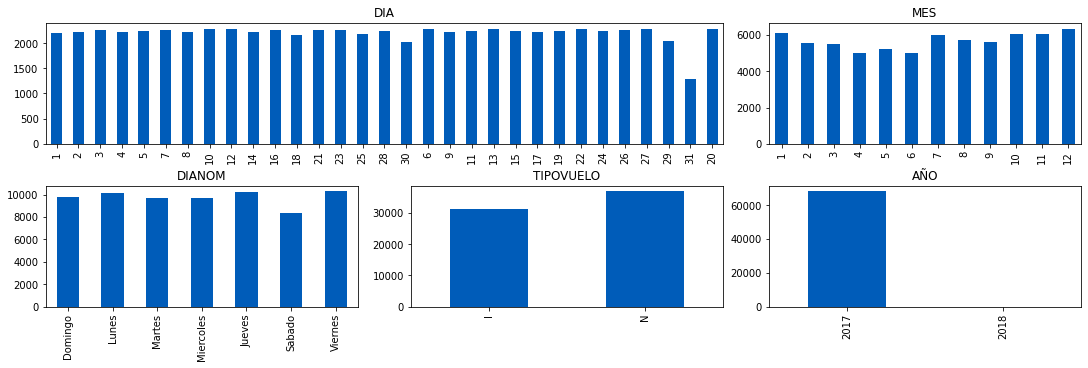

In [14]:
largo=15
alto=5
categorical_features = ['DIA', 'MES', 'AÑO', 'DIANOM', 'TIPOVUELO']
dict=[['DIA', 'DIA','MES'], ['DIANOM', 'TIPOVUELO','AÑO']]
gf.bar_subplot_mosaic(data, dict, categorical_features, largo, alto)

Se puede observar que estas variables tienen una distribución bastante uniforme, lo que da entender que durante todas las fechas, son similares la cantidad de vuelos que operan. Por otro lado según la frecuencia de  DIANOM y MES los dias con mayor cantidad de vuelos son los lunes, jueves y viernes. Los meses que mas vuelos operan corresponden a los períodos de vacaciones en Julio, Diciembre y Enero. Además se observan una mayor de vuelos nacionales que internacionales. Estas distribuciones tienen sentido y se corresponden con el fenómeno donde el período de vacaciones de inverno y finales de año son los períodos en el que mayor cantidad de personas deciden viajar. 

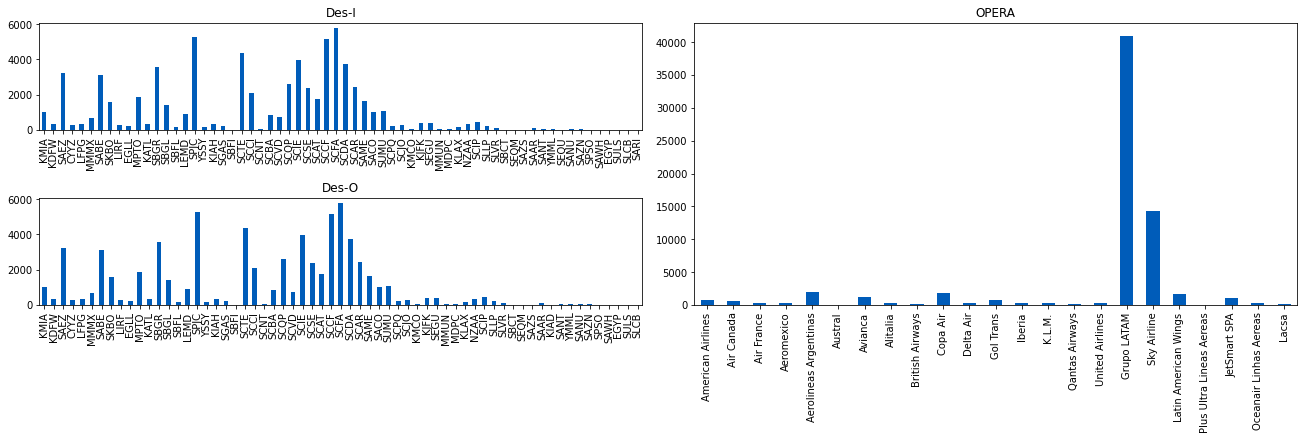

In [15]:
largo=18
alto=6
categorical_features = ['Des-O','Des-I', 'OPERA']
dict=[['Des-I','OPERA'], [ 'Des-O','OPERA']]
gf.bar_subplot_mosaic(data, dict, categorical_features, largo, alto)

ESCRIBIR ANALISIS

Observemos ahora la frecuencia de las aerolineas con vuelo programado y en operación, así como la distribución de las ciudades destino. 

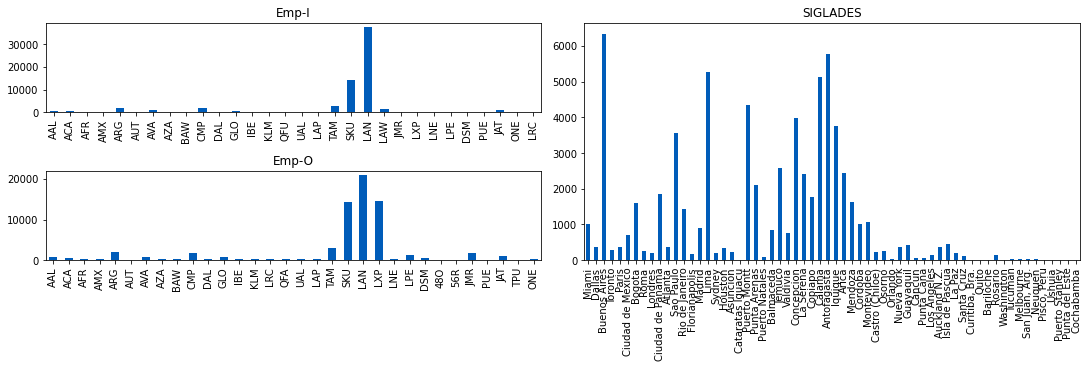

In [16]:
largo=15
alto=5
categorical_features = ['Emp-I', 'Emp-O', 'SIGLADES']
dict=[[ 'Emp-I','SIGLADES'], [ 'Emp-O', 'SIGLADES']]
gf.bar_subplot_mosaic(data, dict, categorical_features, largo, alto)

Las gráficas reflejan Emp-I y Emp-O reflejan similares distribuciones, aunque la frecuencia de las aerolineas que operan (Emp-O) disminuye respecto a su programació, aunque mantienen la misma tendencia en la distribución. La gráfica de las ciudades destinos refleja que la mayor frecuencia de vuelos es en ciudades nacionales, y las internacionales de mayor frecuencia son las que se encuentran en la parte sur del continente (Brasil, Argentina, Perú) 

Analizando los vuelos programados y los operados, vamos a separarlos según el TIPOVUELO para una mejor visualizacion de sus distribuciones. 

In [17]:
vlo_internacionales=data[data["TIPOVUELO"]=="I"]
vlo_nacionales=data[data["TIPOVUELO"]=="N"]

Vuelos nacionales:

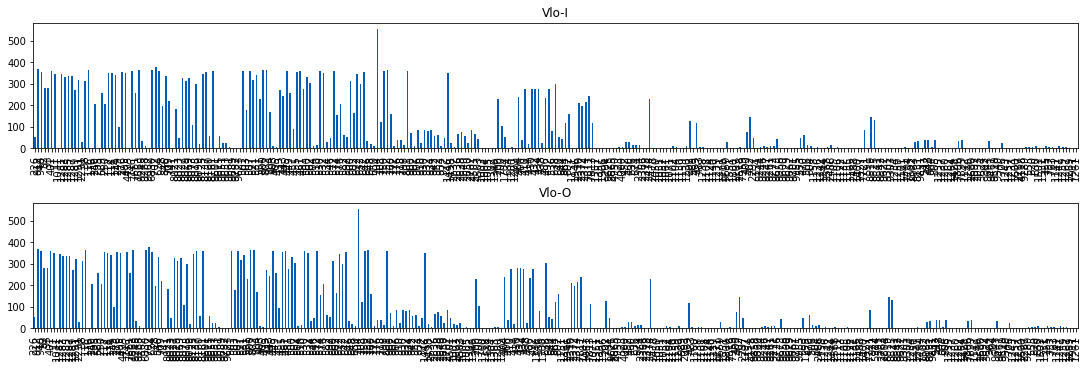

In [18]:
categorical_features = ['Vlo-I',  'Vlo-O']
dict=[['Vlo-I'], ['Vlo-O']]
gf.bar_subplot_mosaic(vlo_internacionales, dict, categorical_features, 15, 5)

Presentan similares distribuciones, lo que da entender que los vuelos que se programan no sufren grandes cambios en su operación. Lo mismo ocurre con los vuelos internacionales en la siguiente gráfica. 

Vuelos internacionales:

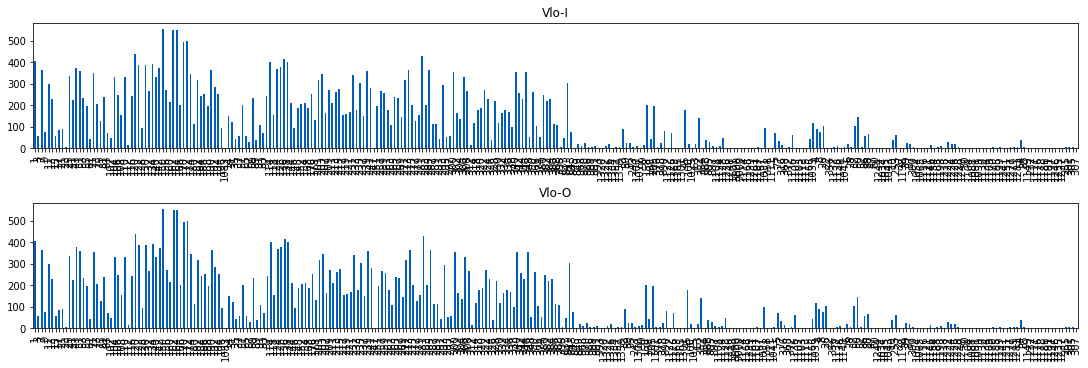

In [19]:
categorical_features = ['Vlo-I',  'Vlo-O']
dict=[['Vlo-I'], ['Vlo-O']]
gf.bar_subplot_mosaic(vlo_nacionales, dict, categorical_features, 15, 5)

Esto refleja en principio, que en este conjunto de datos,la programacion de los vuelos y su operacion, se cumple con una alta frecuencia. Es decir, por lo general, los vuelos programados cumplen su fecha de operación. 

Otras informaciones relevantes se observan en los diagramas de correlación. Utilizaremos el de [Phik](https://nbviewer.org/github/KaveIO/PhiK/blob/master/phik/notebooks/phik_tutorial_basic.ipynb) por que trabajamos con mix de variables categóricas y enteras, y este estadístico es capaz de detectar patrones no lineales entre estos datos. Las variables enteras como Vlo-O y MES, son convertidas a string para evitar interferencias en la selección automática de los columnas de tipo intervalo que aplica el método estadístico. 

In [20]:
data.columns

Index(['Fecha-I', 'Vlo-I', 'Des-I', 'Emp-I', 'Fecha-O', 'Vlo-O', 'Des-O',
       'Emp-O', 'DIA', 'MES', 'AÑO', 'DIANOM', 'TIPOVUELO', 'OPERA',
       'SIGLADES'],
      dtype='object')

In [21]:
data["DIA"]=data["DIA"].astype(str)
data["MES"]=data["MES"].astype(str)
data["Vlo-O"]=data["Vlo-O"].astype(str)
data["Vlo-I"]=data["Vlo-I"].astype(str)

In [22]:
corr_data=data.copy()
columns=[ "TIPOVUELO",'SIGLADES','Des-I', 'Emp-I', 'MES','OPERA','Des-O','Vlo-I',
       'Emp-O','Vlo-O','DIANOM',"DIA"]
corr_data=corr_data[columns]

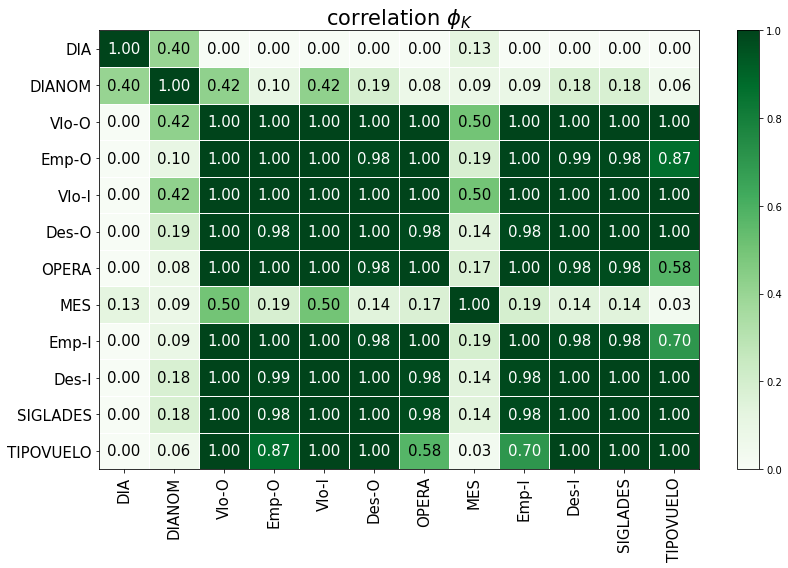

In [23]:
# más adelante agregar este código a la libreria graphics_functions 
phik_overview = corr_data.phik_matrix()
phik_overview.round(2)
plot_correlation_matrix(phik_overview.values, 
                        x_labels=phik_overview.columns, 
                        y_labels=phik_overview.index, 
                      vmin=0, vmax=1, color_map="Greens", 
                        title=r"correlation $\phi_K$", 
                        fontsize_factor=1.5, 
                       figsize=(12, 8))
plt.tight_layout()

 En el diagrama de Phik se observa una alta correlacion entre las variables Vlo-O, Vlo-I, Des-I, Des-O, SIGLADES,Emp-I, Emp-O, OPERA y TIPOVUELO. Las variables  DIANOM, DIA y MES  tienen una baja correlación.  Veamos cuán significativas son estas correlaciones. 

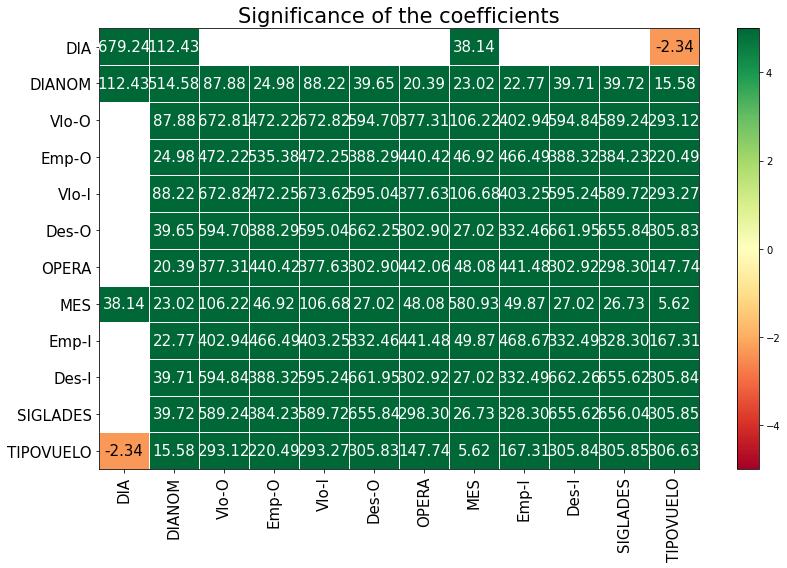

In [24]:
# más adelante agregar este código a la libreria graphics_functions 
significance_overview = corr_data.significance_matrix()
plot_correlation_matrix(significance_overview.fillna(0).values, 
                        x_labels=significance_overview.columns, 
                        y_labels=significance_overview.index, 
                        vmin=-5, vmax=5, title="Significance of the coefficients", 
                        usetex=False, fontsize_factor=1.5, figsize=(12, 8))
plt.tight_layout()

Aqui se pueden deducir dos cosas: 
1. La variable DIA no es significativa, por tanto no existe una correlación significativa entre DIA y el resto de las variables excepto el MES.
2. En las demás variables se evidencia que sus correlaciones son significativas, ya sean que estén poco correlacionadas (Ej: DIANOM y el resto de las variables que presenta coefficientes entre 0.06  y 0.42) o muy correlacionadas (Ej: Vlo-O con coeficientes entre 0.42 y 1.0)

## Punto2 
Genera las columnas adicionales y luego expórtelas en un archivo synthetic_features.csv 
- **temporada_alta** : 1 si Fecha-I está entre 15-Dic y 3-Mar, o 15-Jul y 31-Jul, o 11-Sep y 30-Sep, 0 si no.
- **dif_min** : diferencia en minutos entre Fecha-O y Fecha-I .
- **atraso_15** : 1 si dif_min > 15, 0 si no.
- **periodo_dia** : mañana (entre 5:00 y 11:59), tarde (entre 12:00 y 18:59) y noche (entre 19:00 y 4:59), en base a
Fecha-I .

In [25]:
import datetime

def temporada_alta(row):
    anno = row['Fecha-I'].year
    intervalo_a_ini = datetime.datetime(anno,12,15)
    intervalo_a_fin = datetime.datetime(anno,3,3)
    intervalo_b_ini = datetime.datetime(anno,7,15)
    intervalo_b_fin = datetime.datetime(anno,7,31)
    intervalo_c_ini = datetime.datetime(anno,9,11)
    intervalo_c_fin = datetime.datetime(anno,9,30)
    if ((intervalo_a_ini <= row['Fecha-I'] <= intervalo_a_fin) or 
    (intervalo_b_ini <= row['Fecha-I'] <= intervalo_b_fin)
    or (intervalo_c_ini <= row['Fecha-I'] <= intervalo_c_fin)) :
        return 1
    return 0

def dif_min(row):
    diff = (row['Fecha-O'] - row['Fecha-I']).total_seconds()/60
    return diff

def atraso_15(row):
    if (row['dif_min'] > 15):
        return 1
    return 0

def periodo_dia(row):
    intervalo_a_ini = datetime.time(5,0)
    intervalo_a_fin = datetime.time(11,59)
    intervalo_b_ini = datetime.time(12,0)
    intervalo_b_fin = datetime.time(18,59)
    if (intervalo_a_ini <= row['Fecha-I'].time() <= intervalo_a_fin):
        return "mañana"
    elif (intervalo_b_ini <= row['Fecha-I'].time() <= intervalo_b_fin):
        return "tarde"
    return "noche"
        
data['temporada_alta'] = data.apply(temporada_alta, axis=1)
data['dif_min'] = data.apply(dif_min, axis=1)
data['atraso_15'] = data.apply(atraso_15, axis=1)
data['periodo_dia'] = data.apply(periodo_dia, axis=1)
df = data[['temporada_alta','dif_min','atraso_15','periodo_dia' ]]
df.to_csv("synthetic_features.csv")


## Punto 3
*¿Cómo se compone la tasa de atraso por destino, aerolínea, mes del año, día de la semana, temporada, tipo de
vuelo? ¿Qué variables esperarías que más influyeran en predecir atrasos?*

Para ello se implementa una función *tasa_dataframe* que generaliza el calculo de las tasas. Luego se obtienen los gráficos de barra por cada categoría de las variables de interés, en función del porcentage de atrasos.


In [26]:
def tasa_dataframe(columna):
    dest_df = data.groupby(columna)
    atrasos_summary = []
    
    for (dest,grupo) in dest_df:
        row = {}
        conteo_s = grupo['atraso_15'].value_counts()
        row[columna] = dest
        row['atraso'] = 0  
        row['en_tiempo'] = 0
        
        if 0 in conteo_s.index:
            row['en_tiempo'] = conteo_s[0]
            
        if 1 in conteo_s.index:
            row['atraso'] = conteo_s[1]
            
        atrasos_summary.append(row)
    
    tasa_df = pd.DataFrame(atrasos_summary)
    return tasa_df

### Tasa de atraso por destinos y aerolineas

En ambas gráficas se observa una alta variación en las tasas de atrasos en diferentes destinos y aerolineas. Por tanto estas variables pueden ser útiles para predecir atrasos. 

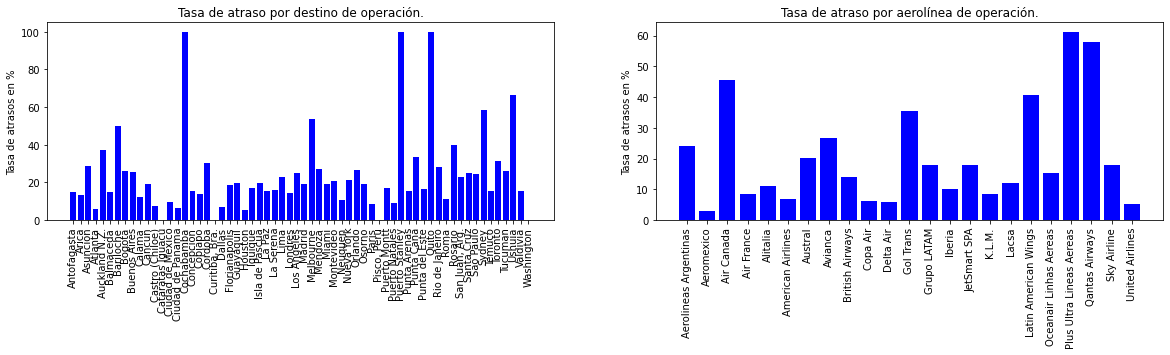

In [27]:
tasa_df = tasa_dataframe('SIGLADES')

x = tasa_df['SIGLADES']
y1 = tasa_df['atraso']
y2 = tasa_df['en_tiempo']

tasa=y1/(y1+y2)*100

tasa_df1 = tasa_dataframe('OPERA')
z = tasa_df1['OPERA']
y3 = tasa_df1['atraso']
y4 = tasa_df1['en_tiempo']
tasa2=y3/(y3+y4)*100

# plot 
plt.figure(figsize=(20,8))
plt.subplot(221)
plt.xticks(rotation=90)
plt.bar(x, tasa,  color='b')
plt.ylabel('Tasa de atrasos en %')
plt.title('Tasa de atraso por destino de operación.')

plt.subplot(222)
plt.xticks(rotation=90)
plt.bar(z, tasa2,  color='b')
plt.ylabel('Tasa de atrasos en %')
plt.title('Tasa de atraso por aerolínea de operación.')
plt.show()

### Tasa de atraso por mes del año y día de la semana

En el gráfico *tasa de atraso por mes* se observa que los meses que mayores atrasos presentan son los meses de vacaciones Julio y Diciembre, el resto de los meses se mantiene variable. A simple vista, se puede decir que la variable MES no presenta una alta correlación con la tasa de atrasos, por lo que puede ser relevante para la predicción. 

El gráfico *tasa de atraso por día de la semana* presenta una menor variabilidad, la diferencia entre los días con mayores atrasos no es tan relevante respecto al resto de los días. Esta variable tendría un menor interés en la predición. 

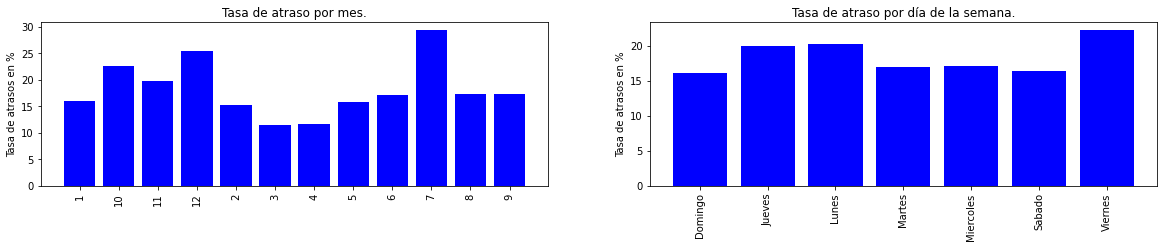

In [28]:
tasa_df = tasa_dataframe('MES')
x = tasa_df['MES']
y1 = tasa_df['atraso']
y2 = tasa_df['en_tiempo']
tasa=y1/(y1+y2)*100

tasa_df1 = tasa_dataframe('DIANOM')
z = tasa_df1['DIANOM']
y3 = tasa_df1['atraso']
y4 = tasa_df1['en_tiempo']
tasa2=y3/(y3+y4)*100

# plot 
plt.figure(figsize=(20, 3))
plt.subplot(121)
plt.xticks(rotation=90)
plt.bar(x, tasa,  color='b')
plt.ylabel('Tasa de atrasos en %')
plt.title('Tasa de atraso por mes.')

plt.subplot(122)
plt.xticks(rotation=90)
plt.bar(z, tasa2,  color='b')
plt.ylabel('Tasa de atrasos en %')
plt.title('Tasa de atraso por día de la semana.')
plt.show()

### Tasa de atraso por temporada y tipo de vuelo

En ambos gráficos se observa una leve variación en las tasas de atraso. Estas dos variables **temporada_alta** y **TIPOVUELO** pueden no ser de interés para la predicción, pero no se pueden descartar a priori. 

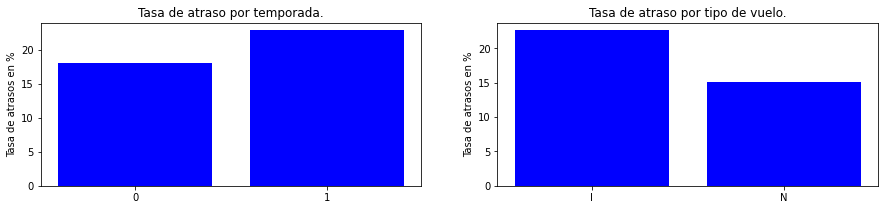

In [29]:
tasa_df = tasa_dataframe('temporada_alta')

x = tasa_df['temporada_alta'].astype(str)
y1 = tasa_df['atraso']
y2 = tasa_df['en_tiempo']
tasa=y1/(y1+y2)*100

tasa_df1 = tasa_dataframe('TIPOVUELO')
z = tasa_df1['TIPOVUELO']
y3 = tasa_df1['atraso']
y4 = tasa_df1['en_tiempo']
tasa1=y3/(y3+y4)*100

# plots
plt.figure(figsize=(15, 3))
plt.subplot(121)
plt.bar(x, tasa,  color='b')
plt.ylabel('Tasa de atrasos en %')
plt.title('Tasa de atraso por temporada.')

plt.subplot(122)
plt.bar(z, tasa1,  color='b')
plt.ylabel('Tasa de atrasos en %')
plt.title('Tasa de atraso por tipo de vuelo.')
plt.show()


Revisemos Los coeficientes de correlación entre la variable objetivo atraso_15 respecto al resto de las variables. 

In [30]:
data.columns

Index(['Fecha-I', 'Vlo-I', 'Des-I', 'Emp-I', 'Fecha-O', 'Vlo-O', 'Des-O',
       'Emp-O', 'DIA', 'MES', 'AÑO', 'DIANOM', 'TIPOVUELO', 'OPERA',
       'SIGLADES', 'temporada_alta', 'dif_min', 'atraso_15', 'periodo_dia'],
      dtype='object')

In [31]:
test=data[['Vlo-I', 'Des-I', 'Emp-I',  'Vlo-O', 'Des-O',
       'Emp-O',  'MES',  'DIANOM', 'TIPOVUELO', 'OPERA',
       'SIGLADES', 'temporada_alta', 'dif_min' ,'atraso_15', 'periodo_dia']]

test["atraso_15"]=data["atraso_15"].astype(str)
test["temporada_alta"]=test["temporada_alta"].astype(str)


interval columns not set, guessing: ['dif_min']


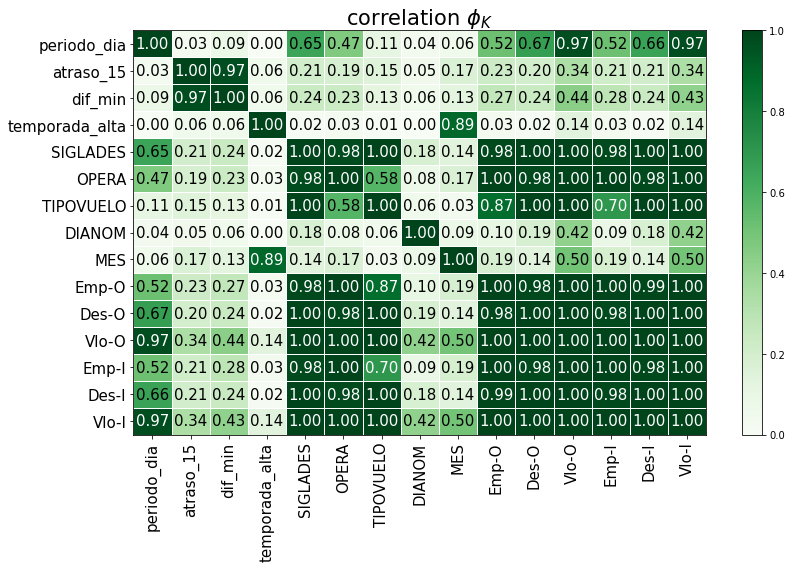

In [32]:
# más adelante agregar este código a la libreria graphics_functions 
phik_overview = test.phik_matrix()
phik_overview.round(2)
plot_correlation_matrix(phik_overview.values, 
                        x_labels=phik_overview.columns, 
                        y_labels=phik_overview.index, 
                      vmin=0, vmax=1, color_map="Greens", 
                        title=r"correlation $\phi_K$", 
                        fontsize_factor=1.5, 
                       figsize=(12, 8))
plt.tight_layout()

Existe una baja correlación entre la variable objetivo atraso_15 y el resto de las variables. Veamos cuán significativas son estas correlaciones. 

interval columns not set, guessing: ['dif_min']


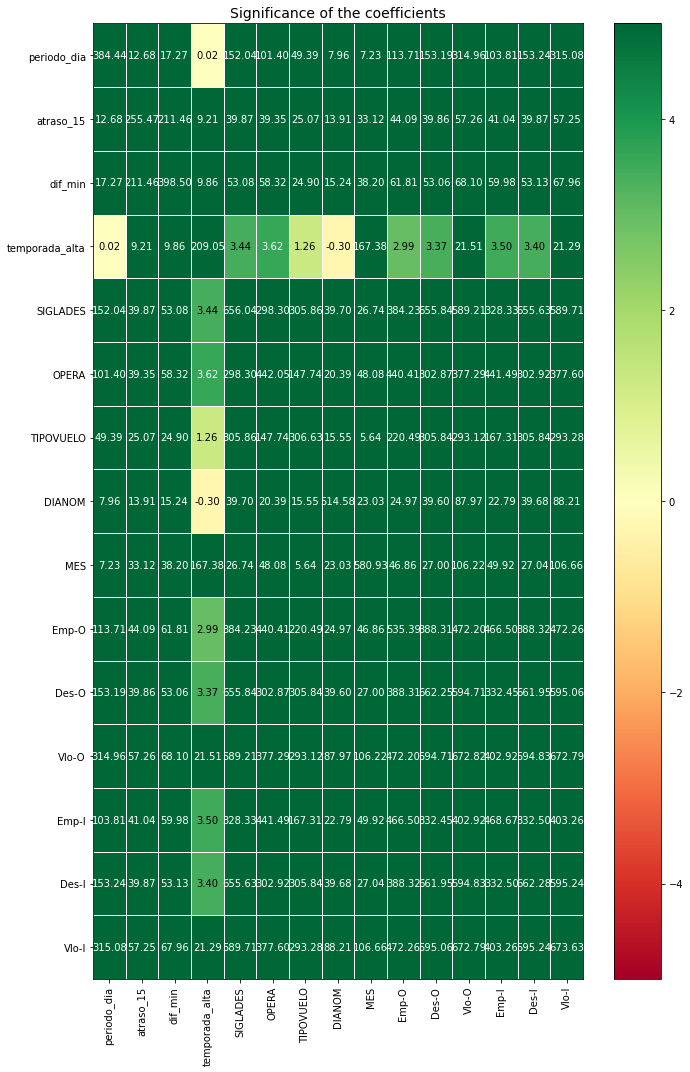

In [33]:
significance_overview = test.significance_matrix()
plot_correlation_matrix(significance_overview.fillna(0).values, 
                        x_labels=significance_overview.columns, 
                        y_labels=significance_overview.index, 
                        vmin=-5, vmax=5, title="Significance of the coefficients", 
                        usetex=False, fontsize_factor=1.0, figsize=(10, 15))
plt.tight_layout()

Según la matriz de significación, existe una relación significativa entre la variable atraso_15 y el resto de las variables, a pesar de tener coeficientes de correlación relativamente bajos. Por ello se decide descartar las variables que presenten entre ellas altas correlaciones(por encima de 0.90) para evitar colinealidades, estas son: Emp-I, Emp-O, Dest-I, Dest-O, SIGLADES. Nos quedaríamos con el resto de las variables para generar un modelo base.  

## Punto 4

*Entrena uno o varios modelos (usando el/los algoritmo(s) que prefieras) para estimar la probabilidad de atraso de un
vuelo. Siéntete libre de generar variables adicionales y/o complementar con variables externas.*

Primero reviso la variable objetivo atraso_15.

In [34]:
print("Clase minoritaria:", data[data['atraso_15']==1].shape[0])
print("Porcentaje del total: ",data[data['atraso_15']==1].shape[0]/data.shape[0]*100)

Clase minoritaria: 12614
Porcentaje del total:  18.493974137172682


Me doy cuenta que hay un desbalance en las etiquetas de clase, ya que son  68206 filas y solamente 12614 son de la clase minoritaria 1, que representa el 18.49 de las muestras. 

Según las variables que tengo, y los resultados del análisis exploratorio me quedo con las variables 'Vlo-O','periodo_dia','DIANOM','MES','SIGLADES'. Además agrego una nueva variable llamada *flujo* que guarda la cantidad de vuelos por fecha.

In [35]:
# Se construye la variable flujo 

def getDate(row):
    return row['Fecha-O'].date()

data['fecha'] = data.apply(getDate, axis=1)
flujo_df = data.groupby('fecha').size().reset_index(name='flujo')

print(flujo_df)

          fecha  flujo
0    2017-01-01    168
1    2017-01-02    199
2    2017-01-03    192
3    2017-01-04    194
4    2017-01-05    198
..          ...    ...
361  2017-12-28    216
362  2017-12-29    219
363  2017-12-30    174
364  2017-12-31    177
365  2018-01-01      2

[366 rows x 2 columns]


In [36]:

   
new_data = pd.merge(data, flujo_df, how='inner', left_on=['fecha'], right_on=['fecha'])
new_data.reindex(data.index)

df = new_data.copy()

#Selecciono las variables predictoras
df=df[['flujo','Vlo-O','periodo_dia','DIANOM','MES','SIGLADES','atraso_15']]

df['periodo_dia']=df['periodo_dia'].astype(object)
df['Vlo-O']=df['Vlo-O'].astype(object)
df['DIANOM']=df['DIANOM'].astype(object)
df['SIGLADES']=df['SIGLADES'].astype(object)
df['MES']=df['MES'].astype(object)



In [37]:
df.columns

Index(['flujo', 'Vlo-O', 'periodo_dia', 'DIANOM', 'MES', 'SIGLADES',
       'atraso_15'],
      dtype='object')

In [38]:
df = df.drop_duplicates(keep='first')

print("Clase minoritaria:", df[df['atraso_15']==1].shape[0])
print("Porcentaje del total: ",df[df['atraso_15']==1].shape[0]/df.shape[0]*100)


Clase minoritaria: 12316
Porcentaje del total:  19.114132290405685


In [39]:
df.columns

Index(['flujo', 'Vlo-O', 'periodo_dia', 'DIANOM', 'MES', 'SIGLADES',
       'atraso_15'],
      dtype='object')

Se preparan los datos y se divide el conjunto en 60% de entrenamiento, 20% de validación  y 20% para prueba. Los datos se particionan manteniendo la misma proporción de etiquetas de clases que en la población original, para garantizar una mejor predicción y  reproducibilidad Además se transforman los datos categóricos o nominales mediante el método OneHotEncoder. 

In [71]:
#### Preparando el dataset
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, Normalizer
import json


X = df.iloc[:,:-1]
y = df['atraso_15']

object_cols = [col for col in X.columns if X[col].dtype == "object"]

# Apply one-hot encoder to each column with categorical data
transformerVectoriser = ColumnTransformer(transformers=[('Vector Cat',OneHotEncoder(handle_unknown='ignore', sparse=False), 
       object_cols)])



#OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
OH_cols = pd.DataFrame(transformerVectoriser.fit_transform(X[object_cols]))

# One-hot encoding removed index; put it back
OH_cols.index = X.index

# Remove categorical columns (will replace with one-hot encoding)
num_X = X.drop(object_cols, axis=1)


# Add one-hot encoded columns to numerical features
X_transformed = pd.concat([num_X, OH_cols], axis=1)



X_trainfull, X_test, y_trainfull, y_test = train_test_split(X_transformed, y, test_size=0.20, random_state=42, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_trainfull, y_trainfull, test_size=0.20, random_state=42, stratify=y_trainfull)


#print(X_train)

[array(['1', '10', '100', '1001', '1003', '1004', '1005', '1011', '102',
       '1025', '1031', '1033', '1034', '1035', '104', '1041', '1043',
       '1050', '1051', '1052', '1054', '106', '1061', '1065', '1071',
       '108', '1083', '1088', '1091', '1099', '11', '110', '1101', '1102',
       '1103', '1104', '1105', '1106', '1107', '1108', '1111', '1113',
       '1114', '1115', '1116', '1117', '112', '1121', '1122', '1124',
       '1126', '1128', '1130', '1132', '1134', '1136', '1138', '114',
       '1140', '1141', '1142', '1146', '1148', '1149', '1151', '1154',
       '1155', '1158', '1159', '116', '1160', '1165', '1166', '1167',
       '1168', '1169', '1170', '1176', '1178', '118', '1186', '1188',
       '1191', '1193', '1195', '1197', '1198', '1199', '120', '1200',
       '1202', '1218', '122', '1222', '1224', '1226', '1228', '1230',
       '1233', '1234', '1235', '1236', '1237', '1238', '1239', '124',
       '1240', '1241', '1242', '1243', '1244', '1246', '1247', '1248',
       '1

Como estamos en presencia de un problema de predicción de la probabilidad de que ocurra un evento, se construye un modelo de regresión logística y teniendo en cuenta hay un gran desbalance entre las clases aplico pesos a cada una en función de lograr una mejor performance. 

In [52]:
##### Defino el modelo

from sklearn.linear_model import LogisticRegression
reg = LogisticRegression(max_iter=1000,random_state=42, class_weight={0:1, 1:6.0},solver='lbfgs')
reg.fit(X_train, y_train)
y_pred = reg.predict(X_val)

## Punto 5

*Evalúa tu modelo. ¿Qué performance tiene? ¿Qué métricas usaste para evaluar esa performance y por qué? ¿Por qué
elegiste ese algoritmo en particular?*

Se utilizan las métricas curva ROC, accuracy, Precision, Recall y una matriz de confusión para visualizar la tasa de aciertos. Como estamos hablando de eventos anómalos, nos interesa considerar qué sería mas costoso o le interesa más al negocio?, tener más falsos positivos o más falsos negativos?.
Si lo que se requiere es bajar la cantidad de falsos positivos, nos interesa tener un alta precisión, en caso contrario, si lo que queremos es disminuir los falsos negativos(creo que por ahí deberíamos enfocarnos más, es más costoso para el negocio predecir que un vuelo sale en tiempo cuando en verdad existe un atraso) entonces nos interesa tener una alta sensitividad o  recall.

 Me fijo principalmente en la sensibilidad(recall) por que interesa conocer la capacidad del modelo para predecir los casos de la clase positiva(1) y ver en qué medida se disminuyen los falsos negativos. 

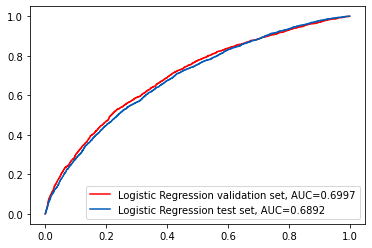

In [53]:
from sklearn import  metrics

y_pred_proba1 = reg.predict_proba(X_val)[:,1]
fpr, tpr, _ = metrics.roc_curve(y_val, y_pred_proba1)
auc = round(metrics.roc_auc_score(y_val, y_pred_proba1), 4)
plt.plot(fpr,tpr,label="Logistic Regression validation set, AUC="+str(auc), color='red')

y_pred_proba = reg.predict_proba(X_test)[:,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
                             
auc = round(metrics.roc_auc_score(y_test, y_pred_proba), 4)
plt.plot(fpr,tpr,label="Logistic Regression test set, AUC="+str(auc))
plt.legend()


Las curvas ROC muestran la capacidad predictiva del clasificador en los conjuntos de train y test en todos los umbrales de clasificación. Y esta métrica tiene un valor de 0.7 y 0.69 en los conjuntos de validacio y prueba. Esto indica que la capacidad predictiva del clasificador para distinguir un vuelo con atraso, es de un  69% basado en las variables de entrada seleccionadas. Lo cual es un resultado aceptable, que debe mejorarse. 

Aunque la eficacia del modelo es aceptable, las variables de recall y precisión en la clase minoritaria (atraso_15=1) nos hacen cuestionar la interpretabilidad de estos resultados, y se sugiere enriquecer este análisis con el impacto que tienen las métricas precisión y recall. 

Primero vamos a seleccionar el punto óptimo de corte entre los umbrales de clasificación del conjunto de test, con el índice de Youden. Esto me permite establecer un balance adecuado entre la tasa de falsos positivos y falsos negativos. 

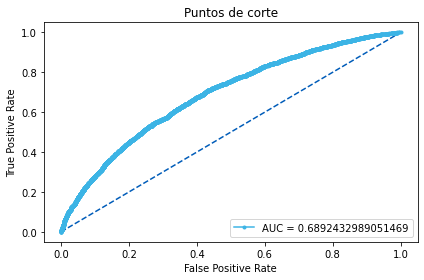

In [54]:
# Buscando los puntos de corte
from sklearn.metrics import  roc_auc_score, roc_curve
y_pred_proba = reg.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = metrics.roc_curve(y_test,y_pred_proba)
plt.title("Puntos de corte")
plt.plot([0,1], [0,1], linestyle="--") # plot random curve
plt.plot(fpr, tpr, marker=".", label=f"AUC = {roc_auc_score(y_test,y_pred_proba)}")   
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.legend(loc="lower right")

plt.tight_layout()
plt.show()

In [55]:
### 4. Model Evaluation  ###
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

print("Conjunto Prueba:")
y_pred_proba = reg.predict_proba(X_test)[:,1]
y_pred_test = reg.predict(X_test) 

fpr, tpr, thresholds = metrics.roc_curve(y_test,y_pred_proba) 
optimal_proba_cutoff = sorted(list(zip(np.abs(tpr - fpr), thresholds)), key=lambda i: i[0], reverse=True)[0][1]
roc_predictions = [1 if i >= optimal_proba_cutoff else 0 for i in y_pred_proba]

print(f'Confusion Matrix: \n{confusion_matrix(y_test, roc_predictions)}')
auc = metrics.roc_auc_score(y_test, roc_predictions)
print("AUC test:", round(auc,2))                             
print(metrics.classification_report(y_test, roc_predictions ))



Conjunto Prueba:
Confusion Matrix: 
[[5909 4515]
 [ 714 1749]]
AUC test: 0.64
              precision    recall  f1-score   support

           0       0.89      0.57      0.69     10424
           1       0.28      0.71      0.40      2463

    accuracy                           0.59     12887
   macro avg       0.59      0.64      0.55     12887
weighted avg       0.78      0.59      0.64     12887



 El mejor punto de corte se encuentra en 0.64, con una precision del modelo para la clase negativa(0) de 0.88 y 0.28 para la clase positiva(1), esto implica que la calidad de la predicción para la clase mayoritaria es mejor que para la clase minoritaria. En cuanto a sensibilidad, el recall se comporta mejor en la clase minoritaria lo que indica que el modelo es capaz de clasificar como atraso al 71% de los atrasos reales.   

*¿Qué variables son las que más influyen en la predicción? ¿Cómo podrías mejorar la performance?*

Para obtener las variables que influyen en la predicción obtenemos los coeficientes para cada una, como existen variables dummy que fueron obtenidas mediante el one hot encoding, solo mostraremos las primeras k features, en orden descendente del coeficiente. Como los coeficientes de la regresiom logistica obtenidos representan las probabilidades logarítmicas de que una observación esté en la clase positiva ("1") dados los valores de sus variables dependientes, vamos a transformarlos en probabilidades para que tengan sentido.

In [103]:



importance = reg.coef_[0]
enc_col_out = transformerVectoriser.named_transformers_['Vector Cat'].get_feature_names_out()
enc_col_out_imp = importance[transformerVectoriser.output_indices_['Vector Cat']]



rem_cols = []
for (tname, _, cs) in transformerVectoriser.transformers_:
    if tname == 'remainder': rem_cols = X.columns[cs]; break
rem_col_imp = importance[transformerVectoriser.output_indices_['remainder']]



# storing them in a df for easy manipulation
imp_df = pd.DataFrame(data={'feature': ( list(['flujo']) + list(enc_col_out) + list(rem_cols)), 'importance': (list([importance[0]])+list(enc_col_out_imp)  + list(rem_col_imp))})

### Salvando categorias para producción
salvar=transformerVectoriser.named_transformers_['Vector Cat'].categories_

import pickle
with open('../model-api/models/categories', 'wb') as fp:
    pickle.dump(salvar, fp)


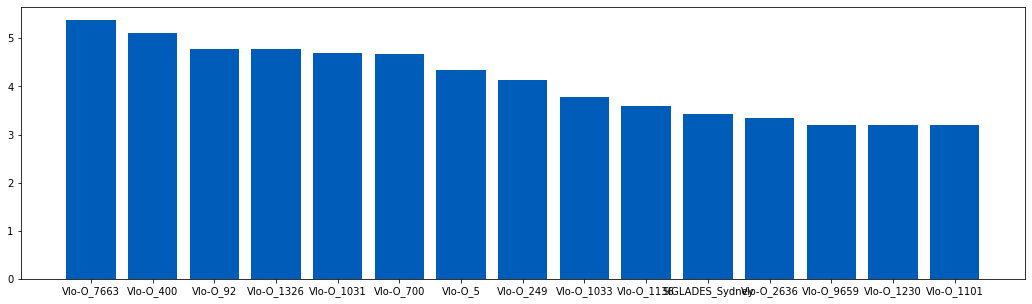

In [57]:
k=15
coefs_df=pd.DataFrame()
coefs_df['features']=imp_df['feature']
coefs_df['importance']=reg.coef_[0]
coefs_df['exp']=np.exp(reg.coef_[0])
coefs_df = coefs_df.sort_values('exp', ascending=False)

from matplotlib import pyplot
f, ax = pyplot.subplots(figsize=(18,5))
pyplot.bar( coefs_df['features'][0:k],[x for x in coefs_df['exp'][0:k] ])
pyplot.show()


 Asumimos que la influencia de una variable se considera a la cantidad de veces que esta incide en la probabilidad de que una observación sea un atraso. Se observa entonces que las variables referidas al número de vuelo (Vlo-O) son las que más influyen en la predicción. Revisando las primeras cinco variables tenemos que:

In [58]:
coefs_df[0:5]

,features,importance,exp
472,Vlo-O_7663,1.682993,5.381637
350,Vlo-O_400,1.632428,5.116280
538,Vlo-O_92,1.563319,4.774644
149,Vlo-O_1326,1.562380,4.770162
11,Vlo-O_1031,1.547283,4.698686


Por cada presencia de Vlo-7663, las probabilidades de que la observación sea un atraso son 5.38 veces mayores que las probabilidades de que la observación no sea un atraso, cuando todas las demás variables se mantienen constantes. Similar ocurre con el vuelo Vlo-O_400.

Para mejorar la performance se puede hacer ingeniería de características, aplicar métodos de selección de rasgos como RFE, intentar encontrar nuevas variables a partir de las existentes  o combinarlas, además de agregar otras externas como el clima en aeropuerto, fallas técnicas o ciclo de mantenimiento del avión. 

Además, se pueden probar otros algoritmos como k-Nearest Neighbors, Decision Trees, Support Vector Machine, o Naive Bayes. De estos escogería los que permitan una mejor interpretabilidad del resultado. 

Vamos a salvar el modelo 

In [94]:
import joblib
filename = '../model-api/models/model_version_1_0_0.joblib'
joblib.dump(reg, filename)

['../model-api/models/model_version_1_0_0.joblib']